In [7]:
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D

from diffmaps_util import k, diag

In [8]:
X = np.array([.9,1.1,1.2,1.3]).reshape(2,2)
X = np.array([.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]).reshape(3,3)

array([[ 0.9,  1.1,  1.2],
       [ 1.3,  1.4,  1.5],
       [ 1.6,  1.7,  1.8]])

In [9]:
%matplotlib inline

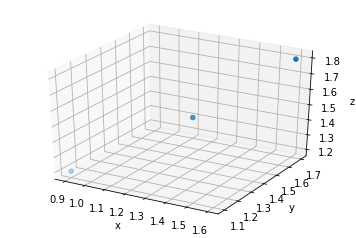

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

$
M = D^{-1}L
$

In [11]:
L = k(X, .7)
D = diag(L)
M = inv(D).dot(L)
# Mi,j denotes the transition probability
# from the point xi to the point xj in one time step
print M

[[ 0.55778813  0.34318337  0.09902851]
 [ 0.26806012  0.43568764  0.29625225]
 [ 0.09557879  0.36606396  0.53835725]]


<p>Equivalente a</p>
$
M_{i,j}=\frac{k_\epsilon(x_i, x_j)}{p_\epsilon(x_j)}
$
<p>onde</p>
$
p_\epsilon(x_j) = \sum_i k_\epsilon(x_i, x_j)
$

In [12]:
L/L.sum(axis=1).reshape(-1,1)

array([[ 0.55778813,  0.34318337,  0.09902851],
       [ 0.26806012,  0.43568764,  0.29625225],
       [ 0.09557879,  0.36606396,  0.53835725]])

---
$
Ms = D^{1/2}LD^{-1/2}
$

In [17]:
Ms = (diag(D,.5)).dot(M).dot(diag(D,-.5))
Ms

array([[ 0.55778813,  0.30330475,  0.09728836],
       [ 0.30330475,  0.43568764,  0.32931333],
       [ 0.09728836,  0.32931333,  0.53835725]])

Equivalente a
$
Ms = \frac{L_{i,j}}{(d(x_i) \times d(x_j))^{1/2}}
$

In [16]:
p = L.sum(axis=1)
for i in range(0,3):
    a = []
    for j in range(0,3):
        a.append(L[i,j]/(p[i]*p[j])**.5)
    print a

[0.55778812593133109, 0.30330475353984732, 0.097288359660921531]
[0.30330475353984748, 0.43568763730560173, 0.32931333276734809]
[0.097288359660921614, 0.32931333276734809, 0.53835724641066274]


---

In [15]:
w, v0, v1 = eig(Ms, left=True)
w = w.real
print '%s\n%s' % (w, v0)

[ 1.          0.45188532  0.07994769]
[[-0.54912401 -0.73404914  0.39954309]
 [-0.62132302  0.03883155 -0.78259173]
 [-0.55894591  0.67798523  0.47740497]]


$
P \times \psi_l = \lambda_l \times \psi_l
$

In [12]:
Ms.dot(v0)

array([[-0.54912401, -0.33170603,  0.03194255],
       [-0.62132302,  0.01754741, -0.0625664 ],
       [-0.55894591,  0.30637157,  0.03816742]])

In [213]:
w * v0

array([[-0.54912401, -0.33170603,  0.03194255],
       [-0.62132302,  0.01754741, -0.0625664 ],
       [-0.55894591,  0.30637157,  0.03816742]])

---
Implementação
* https://github.com/petermuehlbacher/diffusion-maps-algorithm/blob/b4e91352459b2c4e6b0d3358b5b3e4040762d9c5/diffusion%20maps.py

In [40]:
w = w[::-1]

In [71]:
phi = v0.T
phi = phi[::-1]
#print w, '\n', phi
print w, '\n', phi

[ 1.          0.45188532  0.07994769] 
[[ 0.39954309 -0.78259173  0.47740497]
 [-0.73404914  0.03883155  0.67798523]
 [-0.54912401 -0.62132302 -0.55894591]]


In [202]:
psi = []
for i in range(3):
    psi.append([])
    for j in range(2):
        psi[i].append(phi[j+1,i]/M[i])
psi

[[array([-1.31599994, -2.13894149, -7.41250336]),
  array([-0.98446701, -1.60008922, -5.54511042])],
 [array([ 0.14486135,  0.08912704,  0.13107597]),
  array([-2.31784955, -1.42607448, -2.097277  ])],
 [array([ 7.09346943,  1.85209498,  1.25935934]),
  array([-5.84801195, -1.52690777, -1.03824349])]]

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for p in psi:
    ax.scatter(p[0][0],p[0][1],p[0][2])
    ax.scatter(p[1][0],p[1][1],p[1][2])
    #print p[0][0], p[0][1], p[0][2]

---
$$
D_t(x,y) = (\sum_{l \geq 1} \lambda_t^{2t} (\psi_l(x) - \psi_l(y))^2)^{1/2}
$$

In [75]:
l = w.real[::-1]
print l
psi = v0.T[::-1]
print psi

[ 0.07994769  0.45188532  1.        ]
[[ 0.39954309 -0.78259173  0.47740497]
 [-0.73404914  0.03883155  0.67798523]
 [-0.54912401 -0.62132302 -0.55894591]]


In [79]:
phi = []
for i in range(3):
    phi.append(l[i] * psi[i])
phi

[array([ 0.03194255, -0.0625664 ,  0.03816742]),
 array([-0.33170603,  0.01754741,  0.30637157]),
 array([-0.54912401, -0.62132302, -0.55894591])]

In [ ]:
pairwise_distances(phi[1:])**2